In [3]:
from fbprophet import Prophet
%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm 

In [123]:
df = fdr.DataReader('068270','2019-11-18', '2020-11-17')
df = df[['Close']]
df.dropna()
df.reset_index(drop=False, inplace=True)
df.rename(columns = {'Date': 'ds'}, inplace = True)
df.rename(columns = {'Close': 'y'}, inplace = True)
df

,ds,y
0,2019-11-18,178135
1,2019-11-19,175269
2,2019-11-20,176224
3,2019-11-21,169061
4,2019-11-22,167150
...,...,...
243,2020-11-11,296500
244,2020-11-12,292000
245,2020-11-13,290000
246,2020-11-16,288500


In [156]:
prophet = Prophet(seasonality_mode='multiplicative', 
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                changepoint_prior_scale=0.25)
prophet.fit(df)

In [157]:
#5일을 내다보며 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
248,2020-11-18,294686.483294,285812.002149,303587.013332
249,2020-11-19,294735.478803,285585.780334,304458.908234
250,2020-11-20,294397.287985,284344.029853,303594.285051
251,2020-11-21,294333.944607,284845.169341,303941.020049
252,2020-11-22,293506.560178,284154.360545,302543.208183


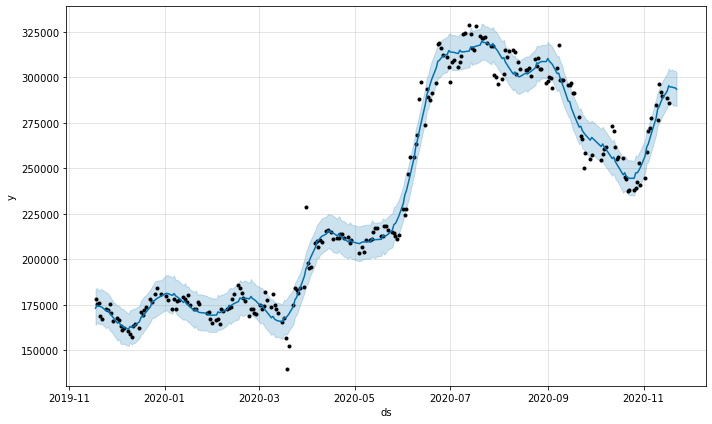

In [158]:
fig1 = prophet.plot(forecast_data)

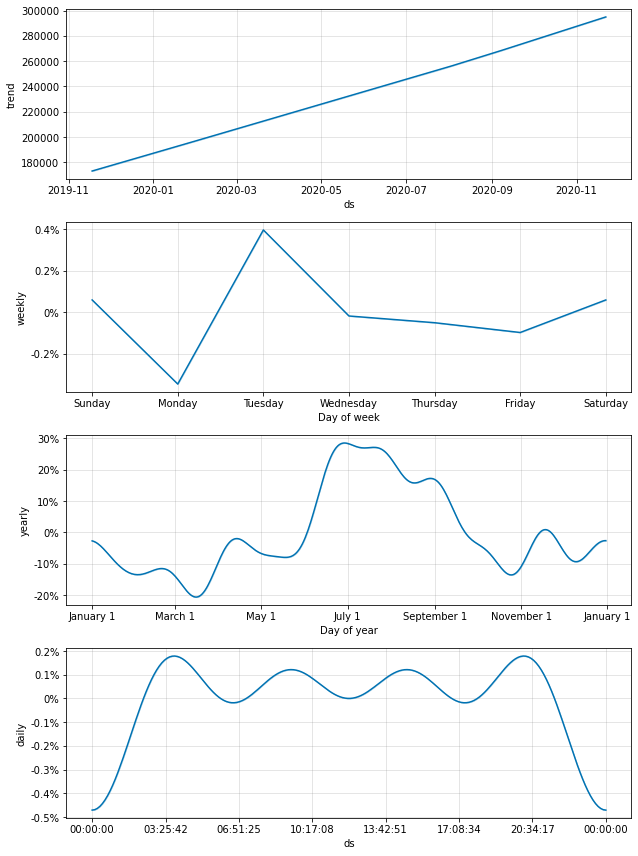

In [159]:
fig2 = prophet.plot_components(forecast_data)

In [160]:
test_df = fdr.DataReader('068270','2020-11-18', '2020-11-24')
test_df = test_df[['Close']]
test_df.dropna()
test_df.reset_index(drop=False, inplace=True)
test_df.rename(columns = {'Date': 'ds'}, inplace = True)
test_df.rename(columns = {'Close': 'y'}, inplace = True)
#마지막 5일의 예측 데이터
pred_y = forecast_data.yhat.values[-5:]
#실제 5일의 가격 데이터 
test_y = test_df.y.values
#마지막 5일 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
#마지막 5일 
pred_y_upper = forecast_data.yhat_upper.values[-5:]



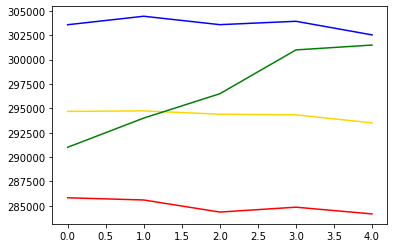

In [161]:
plt.plot(pred_y, color='gold') #모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color='red') #모델이 예상한 최저 가격 그래프
plt.plot(pred_y_upper, color='blue') #모델이 예상한 최고 가격 그래프
plt.plot(test_y, color='green')

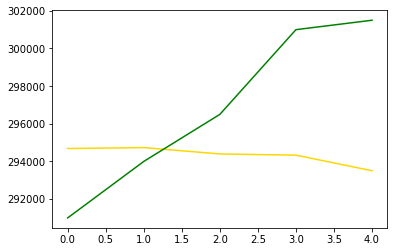

In [162]:
plt.plot(pred_y, color='gold') #모델이 예상한 가격 그래프
plt.plot(test_y, color='green')